In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
from sklearn.manifold import TSNE
from sklearn import cluster
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("melanoma_malignant.txt", sep='\t', header=None)
data = df.values[:,4:]

In [3]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#Scaling the values
X = scale(data)

pca = PCA(n_components=1169)

pca.fit(X)

#variance
var= pca.explained_variance_ratio_

#Cumulative Variance
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

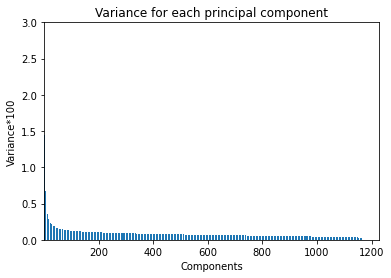

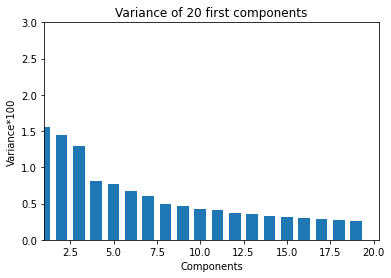

In [4]:
width = 1/1.5
x=np.arange(1169)
plt.bar(x, var*100, width, align='center')
plt.ylim([0,3])  
plt.xlim(xmin=1)
plt.title("Variance for each principal component")
plt.xlabel('Components')
plt.ylabel('Variance*100')
plt.show()

width = 1/1.5
x=np.arange(20)
plt.bar(x, var[:20]*100, width, align='center')
plt.ylim([0,3])   
plt.xlim(xmin=1)
plt.title("Variance of 20 first components")
plt.xlabel('Components')
plt.ylabel('Variance*100')
plt.show()

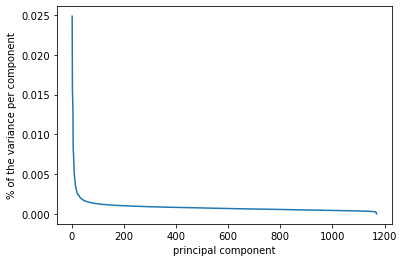

In [5]:
pl.clf()
pl.plot(np.arange(len(pca.explained_variance_ratio_)) + 1, pca.explained_variance_ratio_)
pl.xlabel("principal component")
pl.ylabel("% of the variance per component")
pl.show()

In [6]:
pca = PCA(n_components=8)
pca.fit(data)
X1=pca.fit_transform(data)

n =  2 , silhouette =  0.6683333351014784
n =  3 , silhouette =  0.48137267008447227
n =  4 , silhouette =  0.4702926519587642
n =  5 , silhouette =  0.38314134468995187
n =  6 , silhouette =  0.3836125555331127
n =  7 , silhouette =  0.3320706819569497
n =  8 , silhouette =  0.3582608400215246
n =  9 , silhouette =  0.38212344047541774
n =  10 , silhouette =  0.3205379767127842


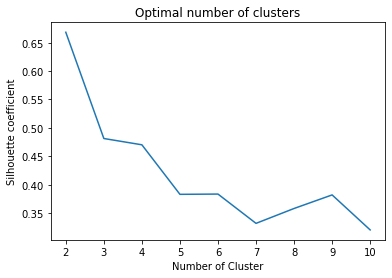

In [7]:
N_small = 1169
coef_s = data[:, np.random.choice (np.arange(data.shape[1]), N_small)][:, :N_small]

ns = [2,3,4,5,6,7,8,9, 10]
ss = []
for n in ns:
    km = cluster.KMeans(n_clusters=n)
    km.fit(np.array(coef_s).transpose())

    labels = km.labels_
    ss.append (metrics.silhouette_score(np.array(coef_s).transpose(), labels))
    print ("n = ", n, ", silhouette = ", ss[-1])
    
pl.plot ()
pl.plot (ns, ss)
pl.title("Optimal number of clusters")
pl.xlabel("Number of Cluster")
pl.ylabel("Silhouette coefficient")
pl.show()

In [8]:
from sklearn.cluster import MeanShift, DBSCAN, SpectralClustering, AgglomerativeClustering
ms = AgglomerativeClustering(n_clusters = 6, connectivity=None).fit(X1)

In [9]:
def plot_latent_space(x_embedded, labels):
    plt.figure(figsize=(8,6))
    for label in np.unique(labels):
        plt.scatter(x_embedded[:, 0][labels==label], x_embedded[:, 1][labels==label], s=100, marker='.', label=label+1)
    new_labels = ["T-cells", "B-cells", "Endothelial", "CAF", "NK", "Macrophages"]
    plt.legend(new_labels)
    plt.title("Single cell expression profile - Melanoma")
    plt.xlabel("tSNE1")
    plt.ylabel("tSNE2")
    plt.show()

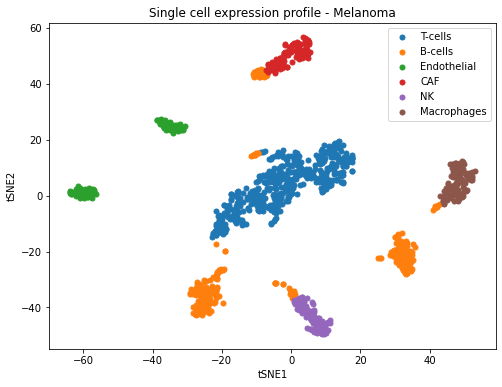

In [10]:
s_scores = []
c_labels = []
embeds = []

labels = AgglomerativeClustering(n_clusters=6, connectivity=None).fit_predict(X1)
x_embedded = TSNE(n_components=2).fit_transform(X1)
plot_latent_space(x_embedded, labels)
c_labels.append(labels)
embeds.append(x_embedded)